In [1]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"]="0"
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import torch

from data.load_datasets import *
import models.model_parameters as params
from experiment._evaluation_one_img import make_prediction

In [2]:
# DataLoader
loader = torch.utils.data.DataLoader(
    CaptionDataset(params.data_folder, params.data_name, 'TEST'),
    batch_size=1, 
    shuffle=True,
    num_workers=1, 
    pin_memory=torch.cuda.is_available())

checkpoint = 'BEST_checkpoint_10_preprocessed_coco.pth.tar'

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7ff1b5a704a8>>
Traceback (most recent call last):
  File "/archive/MyHome/library/conda3/envs/cs470/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/archive/MyHome/library/conda3/envs/cs470/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/archive/MyHome/library/conda3/envs/cs470/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/archive/MyHome/library/conda3/envs/cs470/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/archive/MyHome/library/conda3/envs/cs470/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as co

GT_cap 0: many people are flying kites on a beach
GT_cap 1: there are many large kites flying above the beach
GT_cap 2: a large group of people flying some kites
GT_cap 3: a crowded beach with many kites flying
GT_cap 4: people on a sunny beach flying various kites

Prediction: a group of people flying kites on a beach
Performance
BLEU-1: 88.8889
BLEU-2: 88.1917
BLEU-3: 82.2071
BLEU-4: 72.5980
METEOR: 38.5155
ROUGE_L: 71.3450
url: ['http://images.cocodataset.org/val2014/COCO_val2014_000000483311.jpg']


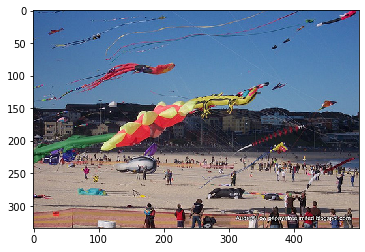

In [61]:
url, image_features, caps, caplens, attributes, allcaps = next(iter(loader))
gt_caps, preds, eval_met = make_prediction(image_features, caps, caplens, attributes, allcaps, checkpoint)

plt.imshow(Image.open(BytesIO(requests.get(url[0]).content)))

for i, gt_cap in enumerate(gt_caps[0]):
    print("GT_cap {}: {}".format(i, gt_cap))

print("\nPrediction: {}".format(preds[0]))

print("Performance")
print("BLEU-1: {0:.4f}".format(eval_met['Bleu_1']*100))
print("BLEU-2: {0:.4f}".format(eval_met['Bleu_2']*100))
print("BLEU-3: {0:.4f}".format(eval_met['Bleu_3']*100))
print("BLEU-4: {0:.4f}".format(eval_met['Bleu_4']*100))
print("METEOR: {0:.4f}".format(eval_met['METEOR']*100))
print("ROUGE_L: {0:.4f}".format(eval_met['ROUGE_L']*100))
print('url: {}'.format(url))